In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

---

## There will be three (or four) kwargs:

- `hline=` ... specify one or a list of prices to generate a ***horizontal line*** at that price level
- `vline=` ... specify one or a list of dates/datetimes to generate a ***vertical line*** at that point in time
- `aline=` ... specify one or more ***arbitrary line*** as
  - list of two or more ***x,y values*** (multiple lines are contiguous)
    - examples:
 `[(dateA,priceA),(dateB,priceB)]`
 `[(dateA,priceA),(dateB,priceB),(dateC,priceC),(dateD,priceD),...]`
  - list of one or more ***x,y value pairs*** (multiple lines need not be contiguous)
where a ***single x,y pair*** is like `((dateA,priceA),(dateB,priceB))`
    - examples: 
`aline=((dateA,priceA),(dateB,priceB))`
`aline=[((dateA,priceA),(dateB,priceB)),((dateC,priceC),(dateD,priceD)),...]`

- `tline=` ... ***trend line*** (still deciding whether to implement this).
  - specify two (or more) dates or datetimes:  mplfinance will ***automatically draw trend lines between the dates***.  An additional kwarg `tline_value` or something like that may specify which algorithm to use for calculating the trend line between any two dates.

---

---

## Test Plan

- Test each kwarg (`hline`, `vline`, `aline`, `tline`) on
  - one month daily data
  - a year or more of daily data
  - a day or more of intraday data
  
- For each kwarg test:
  - one line
  - two or more lines

- For all of the above test EVERY plot type (`ohlc`,`candle`,`line`,`renko`,`pnf`)

- For `aline` test BOTH ways of specifying lines

- For `vline` and `tline` test multiple ways of specifying dates

- Test all of the above both WITH and WITHOUT `make_addplot()` data

- For `tline` test with various `tline_value` settings.
  
---



In [3]:
daily = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


In [4]:
import mplfinance as mpf
mpf.__version__

'0.12.4a0'

---
## aline TESTS:

In [9]:
# make sure works for both sequence of 2 (or more) points, and
# sequence of sequence(s) of 2 (or more) points:
segments1 = [('2019-11-03',3085.),('2019-11-12',3103.)]
segments2 = [[('2019-11-03',3085.),('2019-11-12',3103.)]]

_construct_aline_collections() called: 
alines= [[('2019-11-03', 3085.0), ('2019-11-12', 3103.0)]] 
dtix= DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29'],
              dtype='datetime64[ns]', name='Date', freq=None)
... now lines= [[(0.5, 3085.0), (7.0, 3103.0)]]


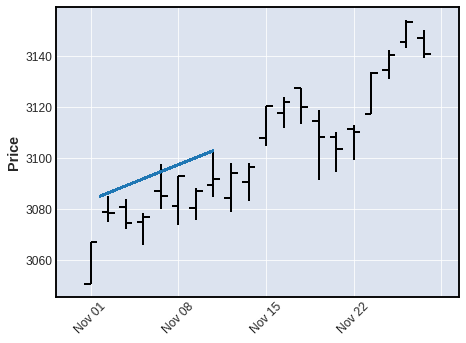

_construct_aline_collections() called: 
alines= [[('2019-11-03', 3085.0), ('2019-11-12', 3103.0)]] 
dtix= DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29'],
              dtype='datetime64[ns]', name='Date', freq=None)
... now lines= [[(0.5, 3085.0), (7.0, 3103.0)]]


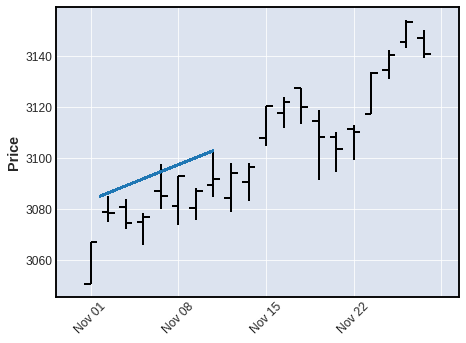

In [10]:
mpf.plot(daily,type='ohlc',alines=segments1)
mpf.plot(daily,type='ohlc',alines=segments2)

In [14]:
segments1 = [('2019-11-03',3085.),('2019-11-12',3103.),('2019-11-19',3127.),('2019-11-22',3100.)]
segments2 = [[('2019-11-03',3085.),('2019-11-12',3103.)],[('2019-11-19',3127.),('2019-11-22',3100.)]]
segments3 = [[('2019-11-03',3085.),('2019-11-12',3103.)],('2019-11-19',3127.),('2019-11-22',3100.)]

_construct_aline_collections() called: 
alines= [[('2019-11-03', 3085.0), ('2019-11-12', 3103.0), ('2019-11-19', 3127.0), ('2019-11-22', 3100.0)]] 
dtix= DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29'],
              dtype='datetime64[ns]', name='Date', freq=None)
... now lines= [[(0.5, 3085.0), (7.0, 3103.0), (12.0, 3127.0), (15.0, 3100.0)]]


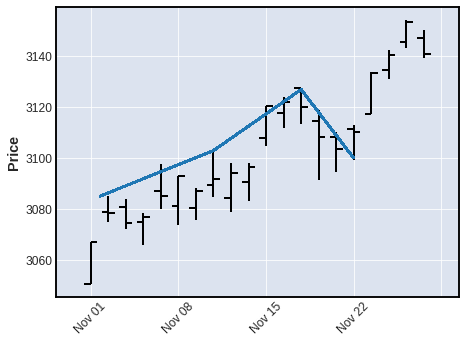

_construct_aline_collections() called: 
alines= [[('2019-11-03', 3085.0), ('2019-11-12', 3103.0)], [('2019-11-19', 3127.0), ('2019-11-22', 3100.0)]] 
dtix= DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29'],
              dtype='datetime64[ns]', name='Date', freq=None)
... now lines= [[(0.5, 3085.0), (7.0, 3103.0)], [(12.0, 3127.0), (15.0, 3100.0)]]


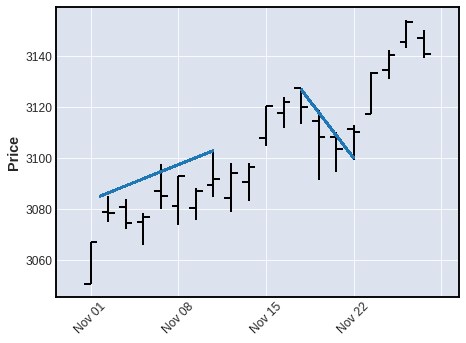

In [17]:
mpf.plot(daily,type='ohlc',alines=segments1)
mpf.plot(daily,type='ohlc',alines=segments2)
# mpf.plot(daily,type='ohlc',alines=segments3)  # This correctly fails the aline validator.

_construct_aline_collections() called: 
alines= [[('2019-11-03', 3085.0), ('2019-11-12', 3103.0), ('2019-11-19', 3127.0), ('2019-11-22', 3100.0)]] 
dtix= DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29'],
              dtype='datetime64[ns]', name='Date', freq=None)
... now lines= [[(0.5, 3085.0), (7.0, 3103.0), (12.0, 3127.0), (15.0, 3100.0)]]


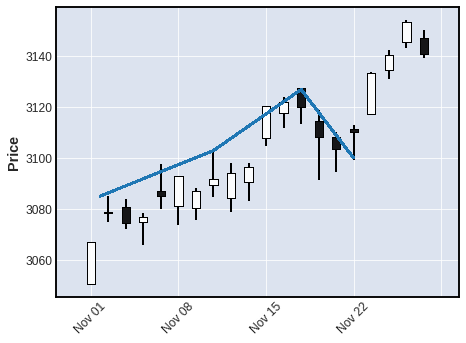

_construct_aline_collections() called: 
alines= [[('2019-11-03', 3085.0), ('2019-11-12', 3103.0)], [('2019-11-19', 3127.0), ('2019-11-22', 3100.0)]] 
dtix= DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29'],
              dtype='datetime64[ns]', name='Date', freq=None)
... now lines= [[(0.5, 3085.0), (7.0, 3103.0)], [(12.0, 3127.0), (15.0, 3100.0)]]


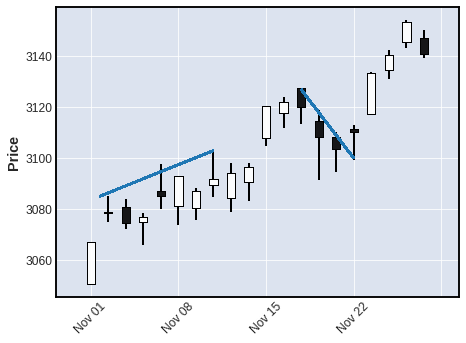

_construct_aline_collections() called: 
alines= [[('2019-11-03', 3085.0), ('2019-11-12', 3103.0), ('2019-11-19', 3127.0), ('2019-11-22', 3100.0)]] 
dtix= DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29'],
              dtype='datetime64[ns]', name='Date', freq=None)
... now lines= [[(0.5, 3085.0), (7.0, 3103.0), (12.0, 3127.0), (15.0, 3100.0)]]


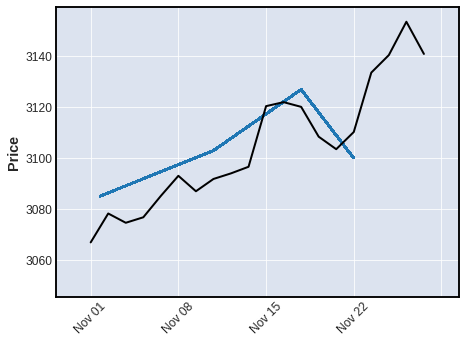

_construct_aline_collections() called: 
alines= [[('2019-11-03', 3085.0), ('2019-11-12', 3103.0)], [('2019-11-19', 3127.0), ('2019-11-22', 3100.0)]] 
dtix= DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29'],
              dtype='datetime64[ns]', name='Date', freq=None)
... now lines= [[(0.5, 3085.0), (7.0, 3103.0)], [(12.0, 3127.0), (15.0, 3100.0)]]


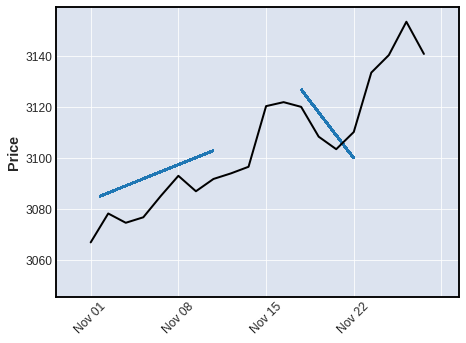

_construct_aline_collections() called: 
alines= [[('2019-11-03', 3085.0), ('2019-11-12', 3103.0), ('2019-11-19', 3127.0), ('2019-11-22', 3100.0)]] 
dtix= DatetimeIndex(['2019-11-01 00:00:00+00:00', '2019-11-01 00:00:00+00:00',
               '2019-11-06 00:00:00+00:00', '2019-11-07 00:00:00+00:00',
               '2019-11-07 00:00:00+00:00', '2019-11-14 00:00:00+00:00',
               '2019-11-14 00:00:00+00:00', '2019-11-14 00:00:00+00:00',
               '2019-11-14 00:00:00+00:00', '2019-11-14 00:00:00+00:00',
               '2019-11-15 00:00:00+00:00', '2019-11-19 00:00:00+00:00',
               '2019-11-20 00:00:00+00:00', '2019-11-22 00:00:00+00:00',
               '2019-11-22 00:00:00+00:00', '2019-11-22 00:00:00+00:00',
               '2019-11-22 00:00:00+00:00', '2019-11-25 00:00:00+00:00',
               '2019-11-26 00:00:00+00:00', '2019-11-26 00:00:00+00:00',
               '2019-11-26 00:00:00+00:00', '2019-11-27 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]',

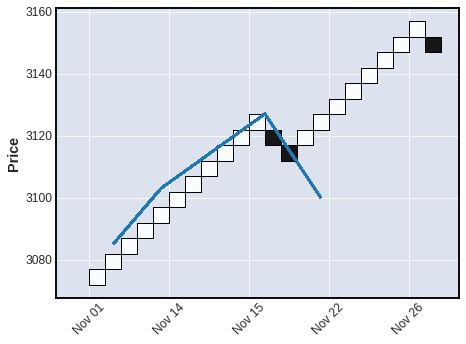

_construct_aline_collections() called: 
alines= [[('2019-11-03', 3085.0), ('2019-11-12', 3103.0)], [('2019-11-19', 3127.0), ('2019-11-22', 3100.0)]] 
dtix= DatetimeIndex(['2019-11-01 00:00:00+00:00', '2019-11-01 00:00:00+00:00',
               '2019-11-06 00:00:00+00:00', '2019-11-07 00:00:00+00:00',
               '2019-11-07 00:00:00+00:00', '2019-11-14 00:00:00+00:00',
               '2019-11-14 00:00:00+00:00', '2019-11-14 00:00:00+00:00',
               '2019-11-14 00:00:00+00:00', '2019-11-14 00:00:00+00:00',
               '2019-11-15 00:00:00+00:00', '2019-11-19 00:00:00+00:00',
               '2019-11-20 00:00:00+00:00', '2019-11-22 00:00:00+00:00',
               '2019-11-22 00:00:00+00:00', '2019-11-22 00:00:00+00:00',
               '2019-11-22 00:00:00+00:00', '2019-11-25 00:00:00+00:00',
               '2019-11-26 00:00:00+00:00', '2019-11-26 00:00:00+00:00',
               '2019-11-26 00:00:00+00:00', '2019-11-27 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]

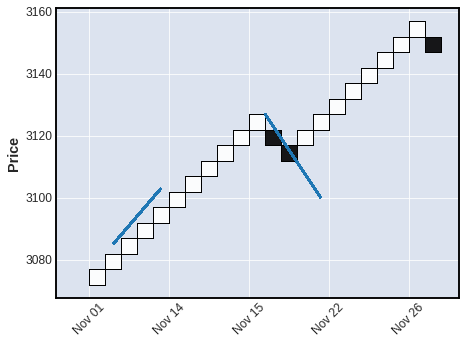

{'renko_bricks': [3071.91,
  3076.91,
  3081.91,
  3086.91,
  3091.91,
  3096.91,
  3101.91,
  3106.91,
  3111.91,
  3116.91,
  3121.91,
  3116.91,
  3111.91,
  3116.91,
  3121.91,
  3126.91,
  3131.91,
  3136.91,
  3141.91,
  3146.91,
  3151.91,
  3146.91],
 'renko_dates': [datetime.datetime(2019, 11, 1, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 1, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 6, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 7, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 7, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 14, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 14, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 14, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 14, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 14, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2

_construct_aline_collections() called: 
alines= [[('2019-11-03', 3085.0), ('2019-11-12', 3103.0), ('2019-11-19', 3127.0), ('2019-11-22', 3100.0)]] 
dtix= DatetimeIndex(['2019-11-01 00:00:00+00:00', '2019-11-19 00:00:00+00:00',
               '2019-11-22 00:00:00+00:00', '2019-11-27 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)
... now lines= [[(0.5, 3085.0), (0.5, 3103.0), (1.0, 3127.0), (2.0, 3100.0)]]


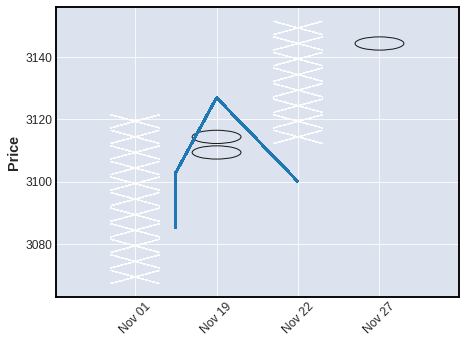

_construct_aline_collections() called: 
alines= [[('2019-11-03', 3085.0), ('2019-11-12', 3103.0)], [('2019-11-19', 3127.0), ('2019-11-22', 3100.0)]] 
dtix= DatetimeIndex(['2019-11-01 00:00:00+00:00', '2019-11-19 00:00:00+00:00',
               '2019-11-22 00:00:00+00:00', '2019-11-27 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)
... now lines= [[(0.5, 3085.0), (0.5, 3103.0)], [(1.0, 3127.0), (2.0, 3100.0)]]


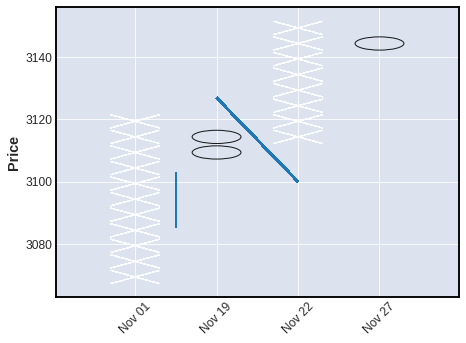

{'pnf_bricks': [3091.9099999999994, 3114.41, 3129.41, 3146.91],
 'pnf_dates': [datetime.datetime(2019, 11, 1, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 19, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 22, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 27, 0, 0, tzinfo=datetime.timezone.utc)],
 'pnf_size': 5,
 'minx': -0.75,
 'maxx': 3.75,
 'miny': 3091.9099999999994,
 'maxy': 3151.91}

In [22]:
mpf.plot(daily,type='candle',alines=segments1)
mpf.plot(daily,type='candle',alines=segments2)

mpf.plot(daily,type='line',alines=segments1)
mpf.plot(daily,type='line',alines=segments2)

cv={}
mpf.plot(daily,type='renko',alines=segments1,renko_params=dict(brick_size=5))
mpf.plot(daily,type='renko',alines=segments2,renko_params=dict(brick_size=5),return_calculated_values=cv)
cv

cv = {}
mpf.plot(daily,type='pnf',alines=segments1,pointnfig_params=dict(box_size=5))
mpf.plot(daily,type='pnf',alines=segments2,pointnfig_params=dict(box_size=5),return_calculated_values=cv)
cv

---

## Now a year or two of daily data:

In [7]:
df = pd.read_csv('../data/yahoofinance-SPY-20080101-20180101.csv',index_col=0,parse_dates=True)
df = df.loc['2015-01-01':'2017-01-01',:]
df.shape
df.head(2)
df.tail(2)

(504, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,193.286972,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,189.796265,169632600


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-29,224.479996,224.889999,223.839996,224.350006,220.071533,47719500
2016-12-30,224.729996,224.830002,222.729996,223.529999,219.267166,108998300


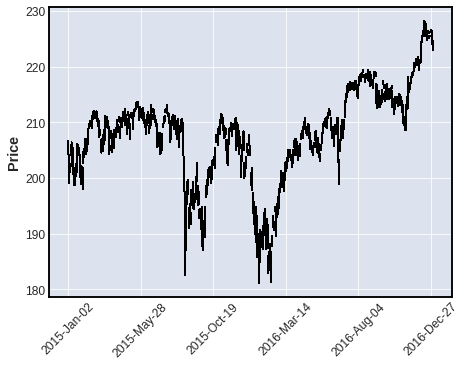

In [8]:
mpf.plot(df)

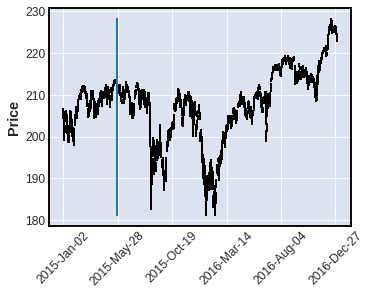

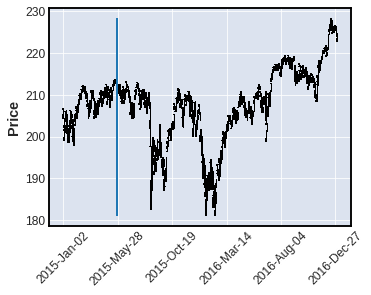

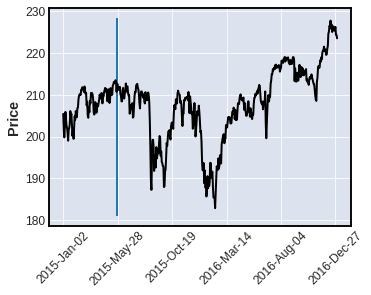

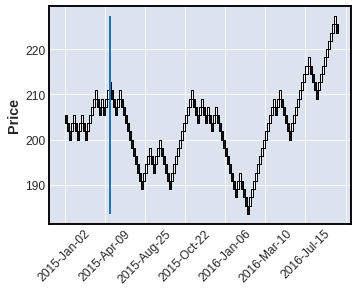

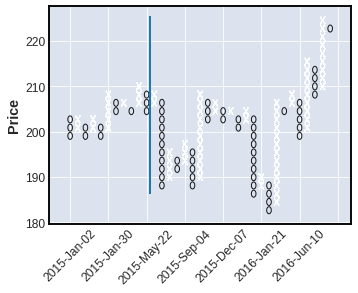

In [9]:
mpf.plot(df,type='ohlc',vlines=['5-27-2015'],figscale=0.75)
mpf.plot(df,type='candle',vlines=['5-27-2015'],figscale=0.75)
mpf.plot(df,type='line',vlines=['5-27-2015'],figscale=0.75)
mpf.plot(df,type='renko',vlines=['5-27-2015'],renko_params=dict(atr_length=90),figscale=0.75)
mpf.plot(df,type='pnf',vlines=['5-27-2015'],pointnfig_params=dict(atr_length=90),figscale=0.75)

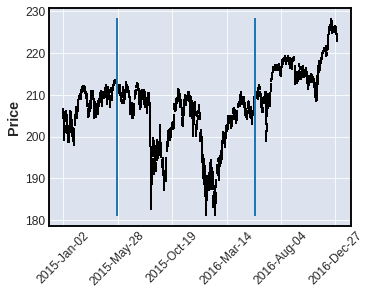

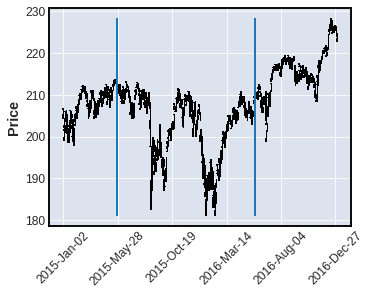

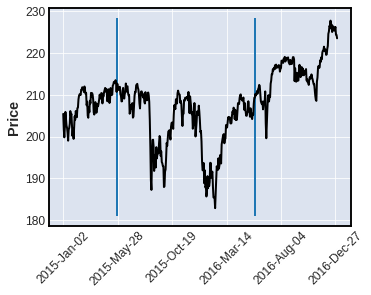

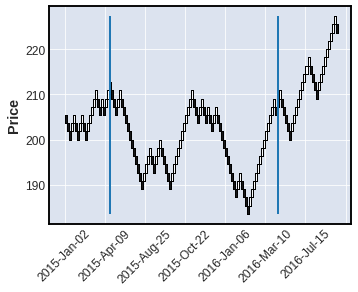

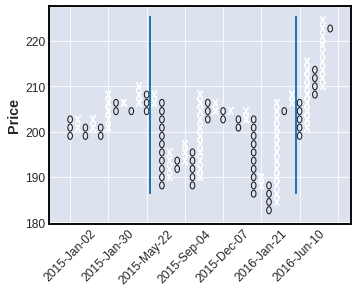

In [10]:
mpf.plot(df,type='ohlc',vlines=['5-27-2015','5-27-2016'],figscale=0.75)
mpf.plot(df,type='candle',vlines=['5-27-2015','5-27-2016'],figscale=0.75)
mpf.plot(df,type='line',vlines=['5-27-2015','5-27-2016'],figscale=0.75)
mpf.plot(df,type='renko',vlines=['5-27-2015','5-27-2016'],renko_params=dict(atr_length=90),figscale=0.75)
mpf.plot(df,type='pnf',vlines=['5-27-2015','5-27-2016'],pointnfig_params=dict(atr_length=90),figscale=0.75)

---

## Now Intraday Data

In [11]:
idf = pd.read_csv('../data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
idf.shape
idf.head(2)
idf.tail(2)

(1563, 5)

,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,0
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,0


,Open,Close,High,Low,Volume
Date,,,,,
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58,0
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96,0


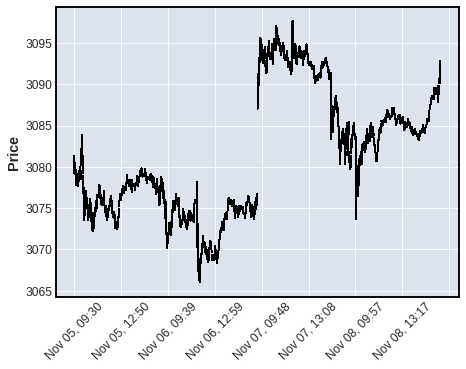

In [12]:
mpf.plot(idf)

In [13]:
len(idf)

1563

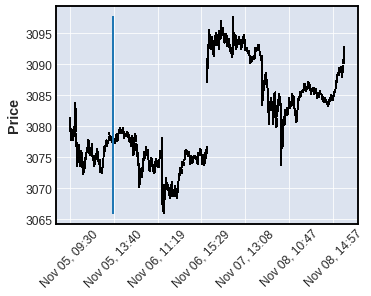

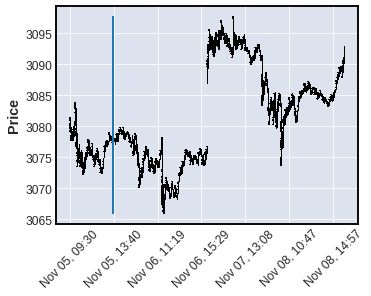

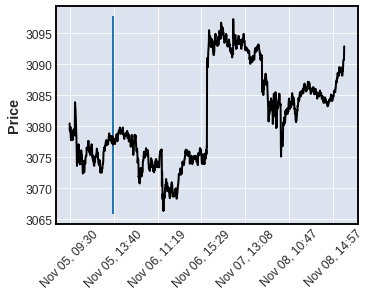

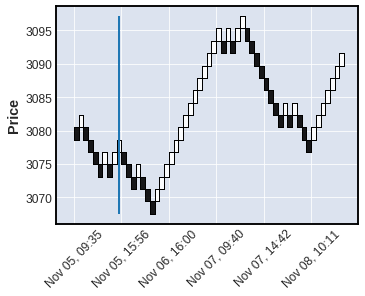

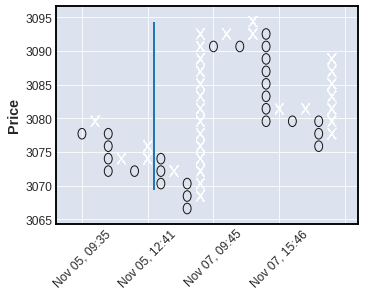

In [14]:
mpf.plot(idf,type='ohlc',vlines=['11/05/2019 13:36'],figscale=0.75)
mpf.plot(idf,type='candle',vlines=['11/05/2019 13:36'],figscale=0.75)
mpf.plot(idf,type='line',vlines=['11/05/2019 13:36'],figscale=0.75)
mpf.plot(idf,type='renko',vlines=['11/05/2019 13:36'],renko_params=dict(brick_size=1.85),figscale=0.75)
mpf.plot(idf,type='pnf',vlines=['11/05/2019 13:36'],pointnfig_params=dict(box_size=1.85),figscale=0.75)

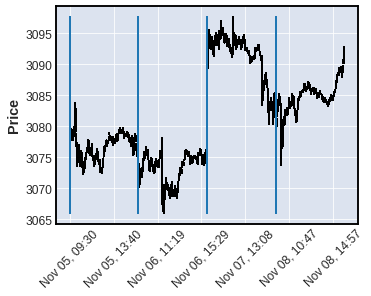

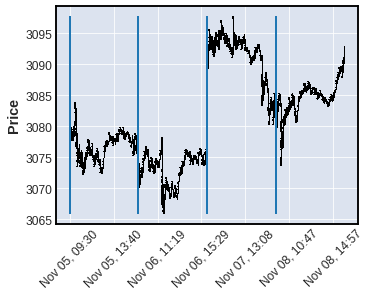

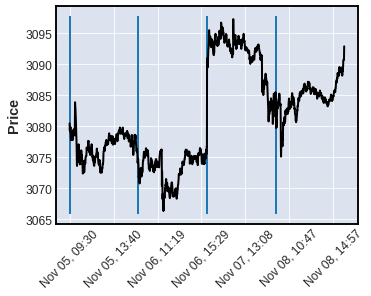

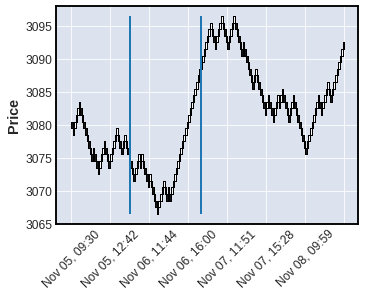

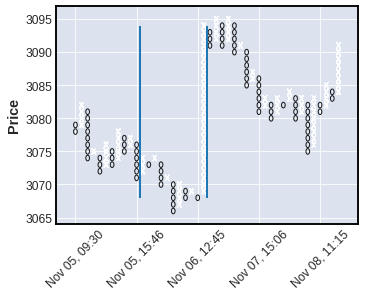

In [15]:
vls = ['11/05/2019 9:30','11/06/2019 9:30','11/07/2019 9:30','11/08/2019 9:30']
vlnoon = ['11/05/2019 12:30','11/06/2019 12:30','11/07/2019 12:30','11/08/2019 12:30']

mpf.plot(idf,type='ohlc',vlines=vls,figscale=0.75)
mpf.plot(idf,type='candle',vlines=vls,figscale=0.75)
mpf.plot(idf,type='line',vlines=vls,figscale=0.75)


mpf.plot(idf,type='renko',vlines=vls[1:3],renko_params=dict(brick_size=1.),figscale=0.75)
mpf.plot(idf,type='pnf',vlines=vls[1:3],pointnfig_params=dict(box_size=1.),figscale=0.75)

#mpf.plot(idf,type='renko',vlines=vlnoon,renko_params=dict(brick_size=0.85),figscale=0.75)

#mpf.plot(idf,type='renko',vlines=['11/05/2019 13:36'],renko_params=dict(brick_size=0.85),figscale=0.75)
#mpf.plot(idf,type='renko',vlines=vls,renko_params=dict(brick_size=0.85),figscale=0.75)
#mpf.plot(idf,type='pnf',vlines=['11/05/2019 13:36'],pointnfig_params=dict(box_size=2),figscale=0.75)

#mpf.plot(idf,type='renko',vlines=vls,renko_params=dict(brick_size=0.85),figscale=0.75)
#mpf.plot(idf,type='pnf',vlines=vlnoon[0],pointnfig_params=dict(box_size=2),figscale=0.75)
#mpf.plot(idf,type='pnf',vlines=['11/05/2019 13:36'],pointnfig_params=dict(box_size=2),figscale=0.75)

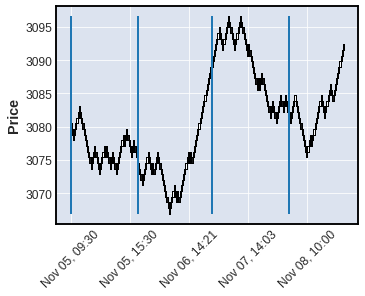

In [16]:
mpf.plot(idf,type='renko',vlines=vls,renko_params=dict(brick_size=0.85),figscale=0.75)

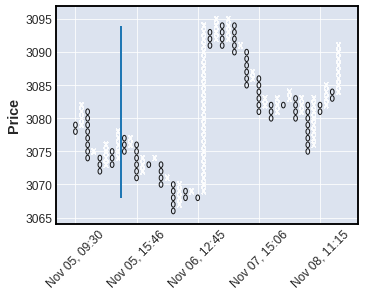

In [17]:
mpf.plot(idf,type='pnf',vlines=['11/05/2019 13:36'],pointnfig_params=dict(box_size=1),figscale=0.75)

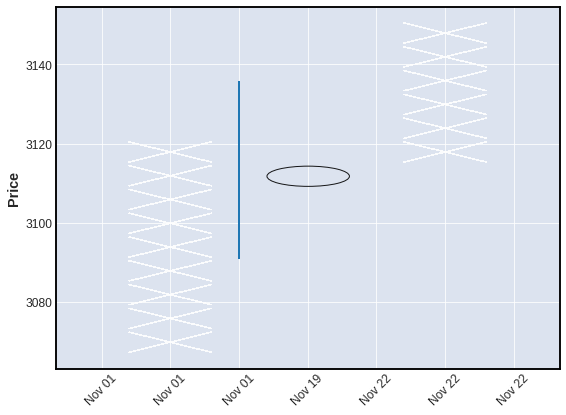

{'pnf_bricks': [3090.91, 3114.91, 3129.91],
 'pnf_dates': [datetime.datetime(2019, 11, 1, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 19, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 11, 22, 0, 0, tzinfo=datetime.timezone.utc)],
 'pnf_size': 6,
 'minx': -0.6666666666666666,
 'maxx': 2.6666666666666665,
 'miny': 3090.91,
 'maxy': 3135.91}

In [18]:
cvals={}

#mpf.plot(daily,type='pnf',vlines=['2019-11-6'],figscale=1.25,return_calculated_values=cvals)
mpf.plot(daily,type='pnf',vlines=['2019-11-6'],pointnfig_params=dict(box_size=6),figscale=1.25,return_calculated_values=cvals)

#mpf.plot(daily,type='pnf',figscale=1.25)#,return_calculated_values=cvals)
cvals

In [19]:
vls = ['11/05/2019 9:30','11/06/2019 9:30','11/07/2019 9:30','11/08/2019 14:30']

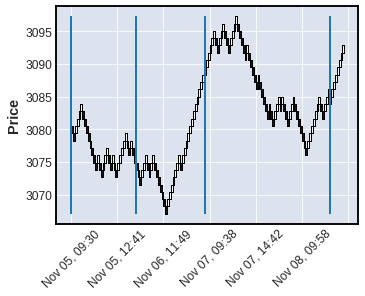

ValueError: User specified line date "11/05/2019 9:30" is before (less than) range of plotted data (2019-11-05 09:32:00+00:00 to 2019-11-08 15:58:00+00:00).

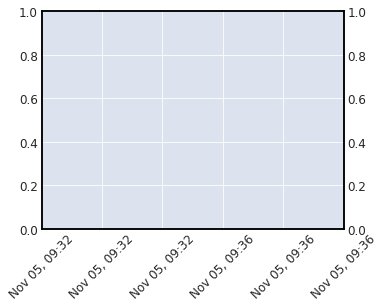

In [20]:
mpf.plot(idf,type='renko',vlines=vls,renko_params=dict(brick_size=1.12),figscale=0.75)
mpf.plot(idf,type='renko',vlines=vls,renko_params=dict(brick_size=1.13),figscale=0.75)
#mpf.plot(idf,type='pnf',vlines=vls[0:3],pointnfig_params=dict(box_size=1.85),figscale=0.75)